In [1]:
%matplotlib inline
import powerlaw
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pl = powerlaw.Power_Law()
pl.alpha = 2.5

In [3]:
data = np.array(pl.generate_random(10000, estimate_discrete=True)) + np.random.rand(10000)*2

In [4]:
dist_fit = powerlaw.Fit(data)

Calculating best minimal value for power law fit
/usr/lib/python2.7/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [5]:
ecdf = sm.distributions.ECDF(dist_fit.data_original, side='left')
x = sorted(list(set(dist_fit.data_original)))
y = 1 - ecdf(x)
x_pl = [float(i) for i in x if i >= dist_fit.power_law.xmin]

In [6]:
shift_y = dist_fit.n_tail/len(dist_fit.data_original)

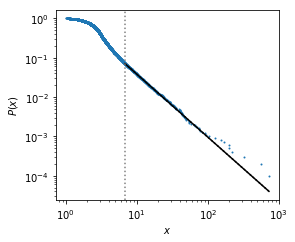

In [7]:
plt.figure(figsize=(4, 3.5))
plt.plot(x, y, marker=".", ls="", ms=2)
plt.plot(x_pl, shift_y*dist_fit.power_law.ccdf(x_pl), color="k")
plt.plot(x_pl, shift_y*dist_fit.truncated_power_law.ccdf(x_pl), color="k", ls=":")
plt.axvline(dist_fit.xmin, color='gray', ls=":")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$x$")
plt.ylabel("$P(x)$");

/usr/lib/python2.7/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


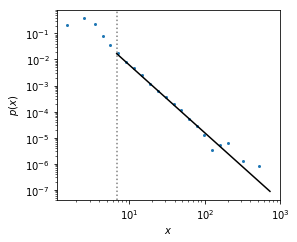

In [8]:
plt.figure(figsize=(4, 3.5))
x = np.linspace(dist_fit.power_law.xmin, dist_fit.data_original.max(), 10)
shift_y = dist_fit.n_tail/len(dist_fit.data_original)
dist_fit.plot_pdf(original_data=True, marker="o", ls="", ms=2)
plt.plot(x, shift_y*dist_fit.power_law.pdf(x), color="k", ls="-")
plt.axvline(dist_fit.xmin, color='gray', ls=":")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$x$")
plt.ylabel("$p(x)$");